<a href="https://colab.research.google.com/github/vineel-M/Project/blob/main/Consumer_Price_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

uploaded = files.upload()


Saving All_India_Index_july2019_20Aug2020_dec20_1_4.csv to All_India_Index_july2019_20Aug2020_dec20_1_4.csv


In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/All_India_Index_july2019_20Aug2020_dec20_1_4.csv')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               357 non-null    object 
 1   Year                                 357 non-null    int64  
 2   Month                                357 non-null    object 
 3   Cereals and products                 354 non-null    float64
 4   Meat and fish                        351 non-null    float64
 5   Egg                                  354 non-null    float64
 6   Milk and products                    354 non-null    float64
 7   Oils and fats                        354 non-null    float64
 8   Fruits                               354 non-null    float64
 9   Vegetables                           354 non-null    float64
 10  Pulses and products                  354 non-null    float64
 11  Sugar and Confectionery         

In [ ]:
# Convert the 'Month' column to a numeric representation (optional, if needed)
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8,
              'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['Month'] = df['Month'].map(month_dict)

In [ ]:
df.fillna(df.mean(), inplace=True)

<ipython-input-9-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# 5. Convert 'Month' column to integer (assuming it represents month numbers)
df['Month'] = df['Month'].astype(int)

# 6. Convert 'Month' and 'Year' columns to datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')
df.drop(['Year', 'Month'], axis=1, inplace=True)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Sector                               357 non-null    object        
 1   Cereals and products                 357 non-null    float64       
 2   Meat and fish                        357 non-null    float64       
 3   Egg                                  357 non-null    float64       
 4   Milk and products                    357 non-null    float64       
 5   Oils and fats                        357 non-null    float64       
 6   Fruits                               357 non-null    float64       
 7   Vegetables                           357 non-null    float64       
 8   Pulses and products                  357 non-null    float64       
 9   Sugar and Confectionery              357 non-null    float64       
 10  Spices        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

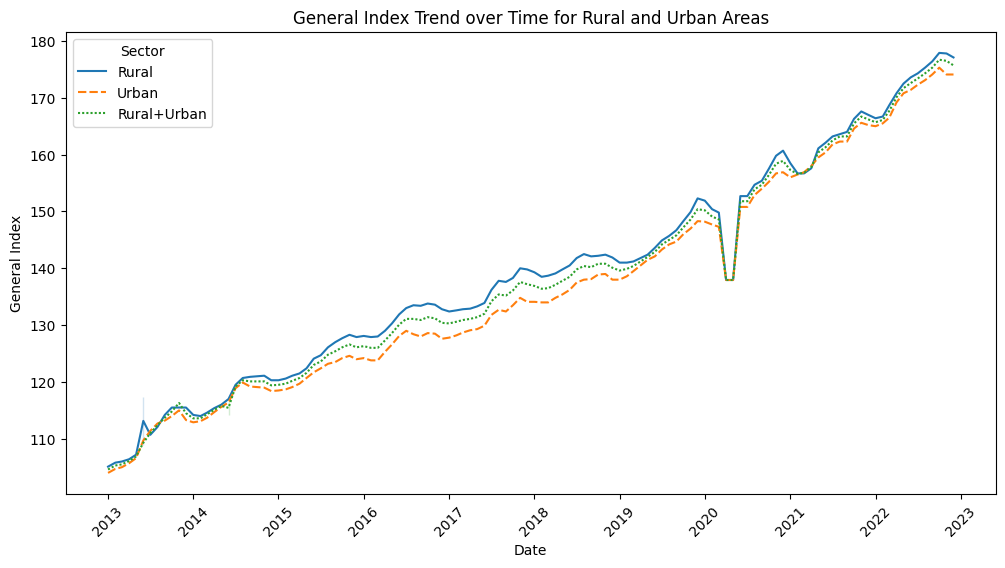

In [ ]:
# 1. Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='General index', hue='Sector', style='Sector', data=df)
plt.xlabel('Date')
plt.ylabel('General Index')
plt.title('General Index Trend over Time for Rural and Urban Areas')
plt.xticks(rotation=45)
plt.show()

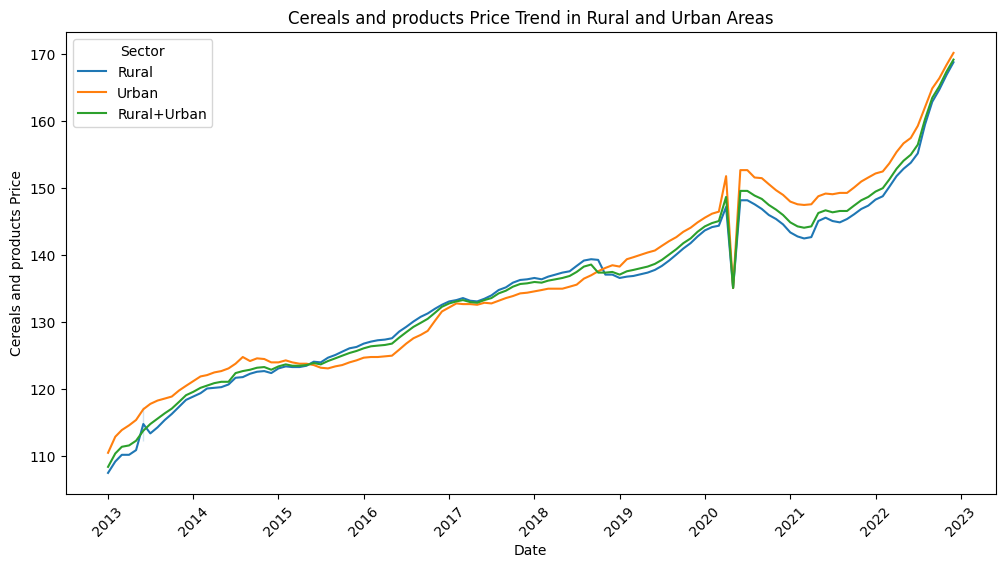

In [ ]:
# 2. Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cereals and products', hue='Sector', data=df)
plt.xlabel('Date')
plt.ylabel('Cereals and products Price')
plt.title('Cereals and products Price Trend in Rural and Urban Areas')
plt.xticks(rotation=45)
plt.show()

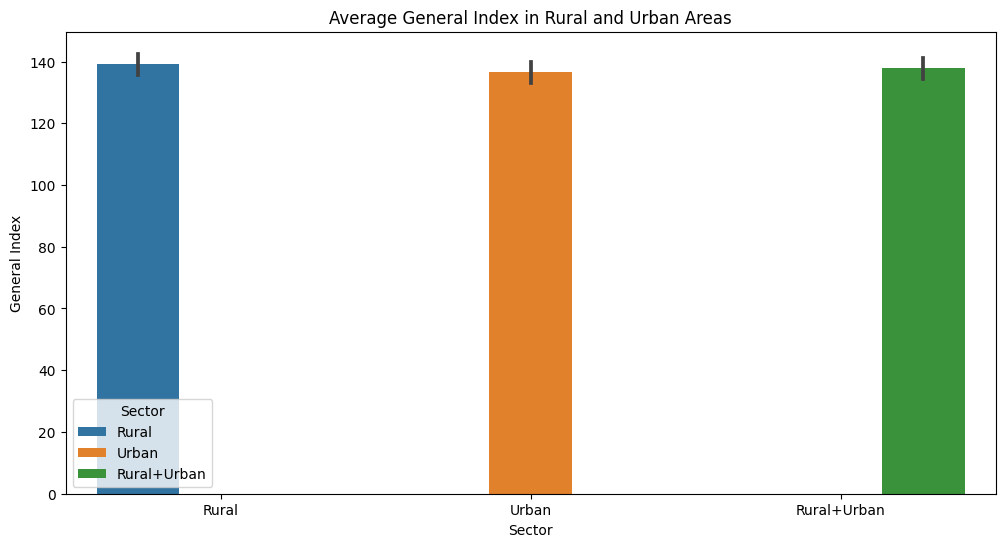

In [ ]:
# 3. Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='General index', hue='Sector', data=df)
plt.xlabel('Sector')
plt.ylabel('General Index')
plt.title('Average General Index in Rural and Urban Areas')
plt.show()

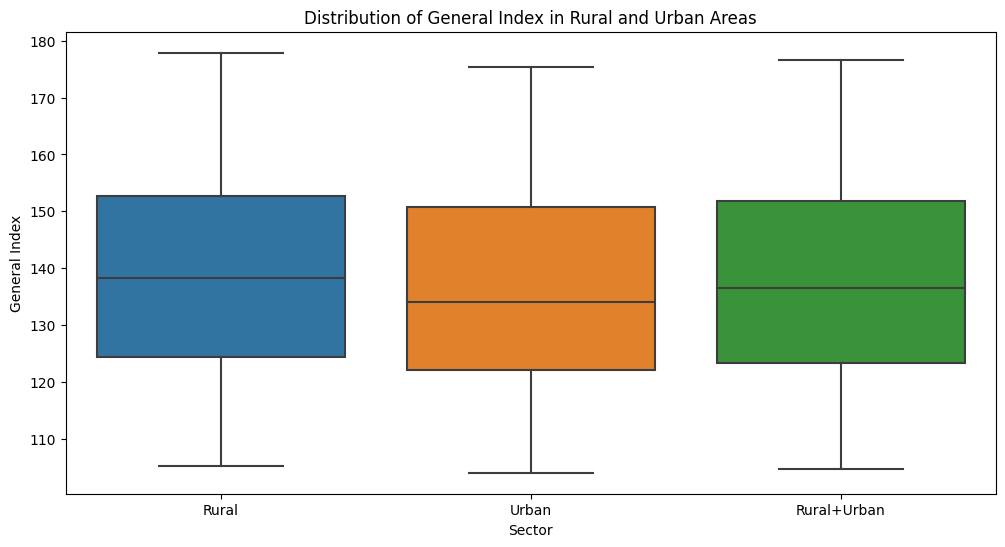

In [ ]:
# 4. Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='General index', data=df)
plt.xlabel('Sector')
plt.ylabel('General Index')
plt.title('Distribution of General Index in Rural and Urban Areas')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Product Categories')

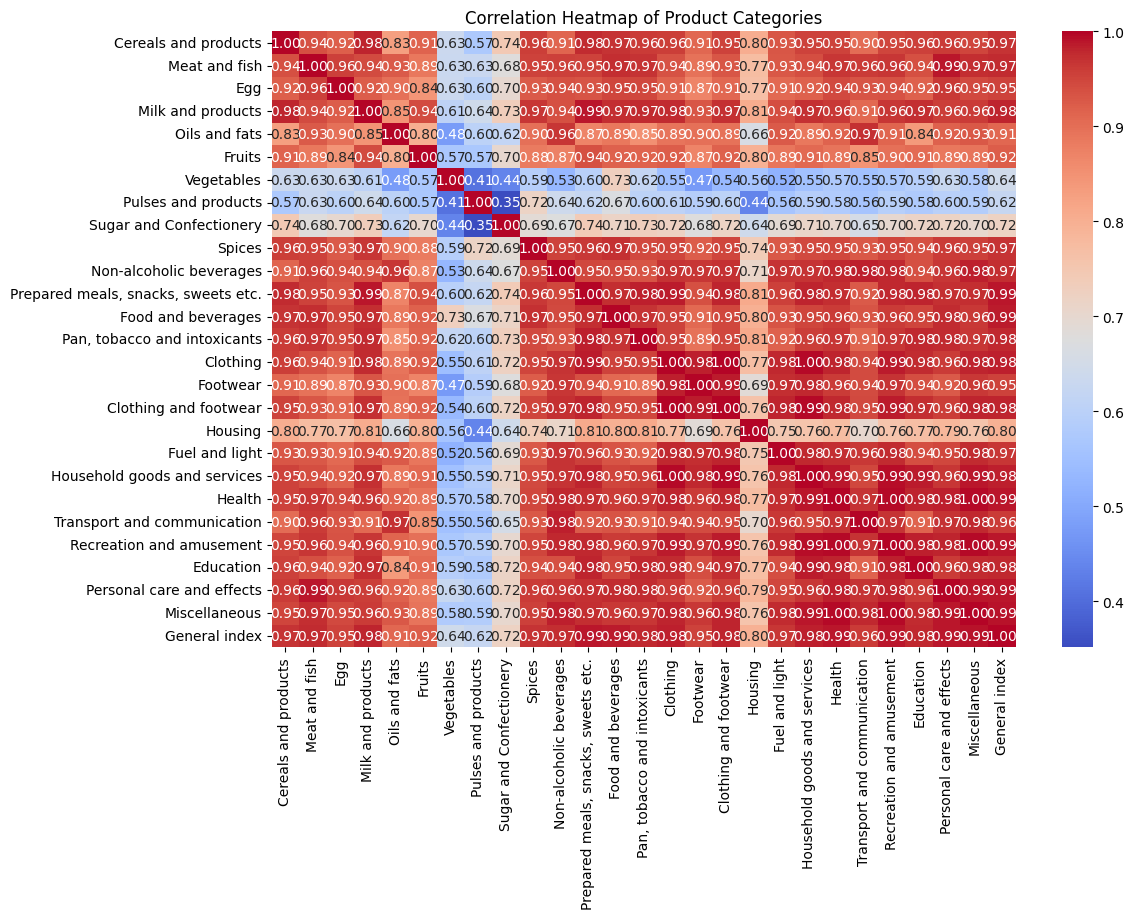

In [ ]:
# 5. Heatmap
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Product Categories')


In [ ]:
df.isnull().sum()

Sector                                   0
Cereals and products                     0
Meat and fish                            0
Egg                                      0
Milk and products                        0
Oils and fats                            0
Fruits                                   0
Vegetables                               0
Pulses and products                      0
Sugar and Confectionery                  0
Spices                                   0
Non-alcoholic beverages                  0
Prepared meals, snacks, sweets etc.      0
Food and beverages                       0
Pan, tobacco and intoxicants             0
Clothing                                 0
Footwear                                 0
Clothing and footwear                    0
Housing                                119
Fuel and light                           0
Household goods and services             0
Health                                   0
Transport and communication              0
Recreation 

In [ ]:
# Convert non-numeric values to NaN
df['Housing'] = pd.to_numeric(df['Housing'], errors='coerce')

# Impute missing values in the 'Housing' column with the mean value
mean_housing = df['Housing'].mean()
df['Housing'].fillna(mean_housing, inplace=True)


In [ ]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Sector, Cereals and products, Meat and fish, Egg, Milk and products, Oils and fats, Fruits, Vegetables, Pulses and products, Sugar and Confectionery, Spices, Non-alcoholic beverages, Prepared meals, snacks, sweets etc., Food and beverages, Pan, tobacco and intoxicants, Clothing, Footwear, Clothing and footwear, Housing, Fuel and light, Household goods and services, Health, Transport and communication, Recreation and amusement, Education, Personal care and effects, Miscellaneous, General index, Date]
Index: []

[0 rows x 29 columns]


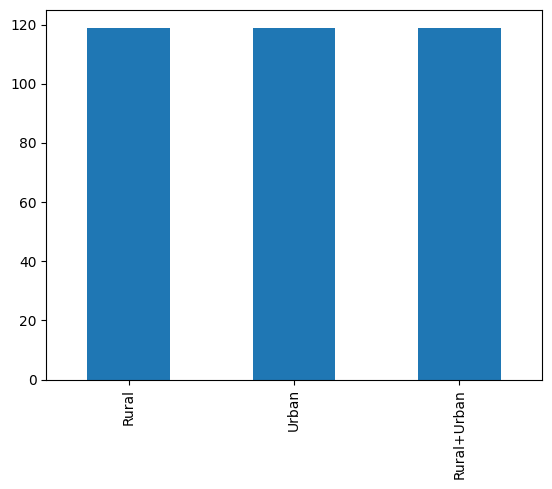

In [ ]:
df['Sector'].value_counts().plot(kind='bar')
plt.show()

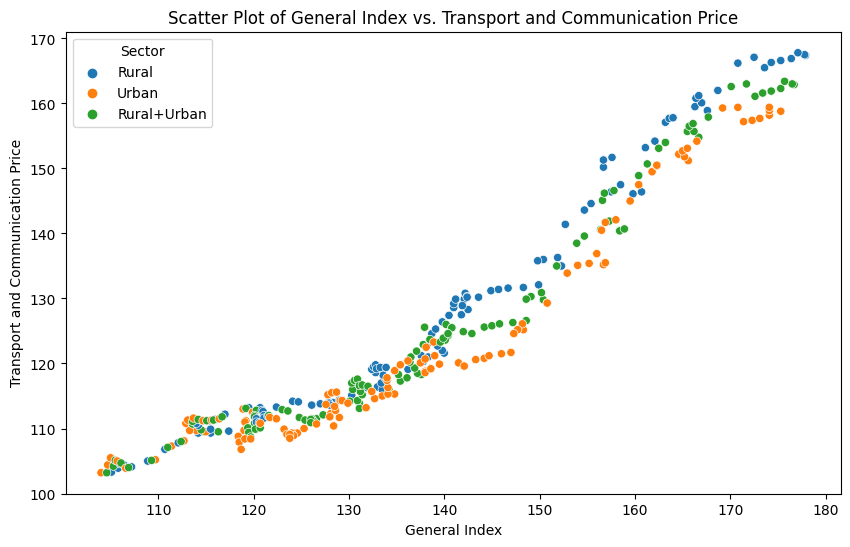

In [ ]:
# 7. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='General index', y='Transport and communication', hue='Sector', data=df)
plt.xlabel('General Index')
plt.ylabel('Transport and Communication Price')
plt.title('Scatter Plot of General Index vs. Transport and Communication Price')
plt.show()

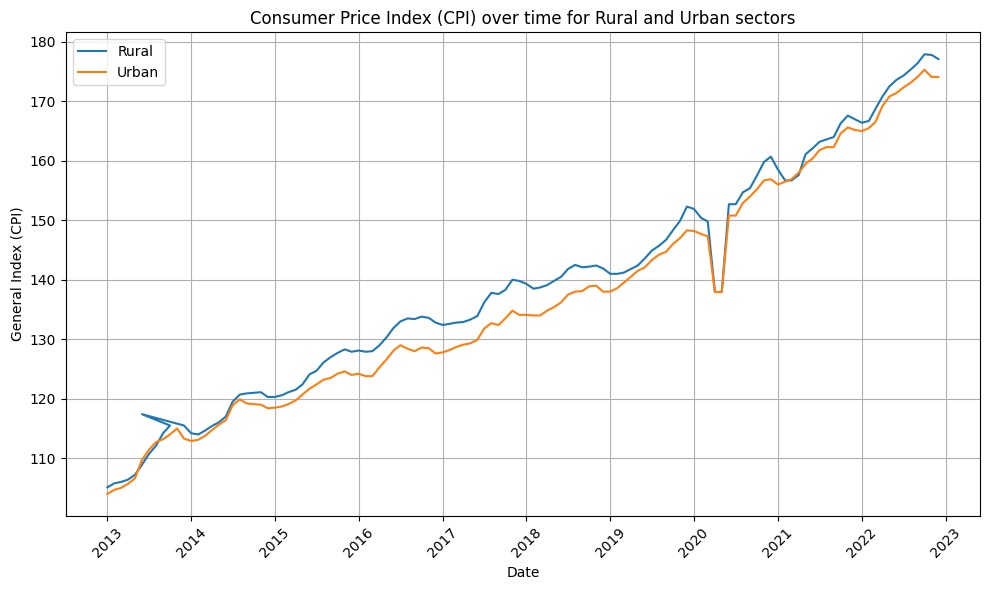

In [ ]:
# Visualization 1: Line plot of Consumer Price Index (CPI) over time for Rural and Urban sectors
plt.figure(figsize=(10, 6))
plt.plot(df[df['Sector'] == 'Rural']['Date'], df[df['Sector'] == 'Rural']['General index'], label='Rural')
plt.plot(df[df['Sector'] == 'Urban']['Date'], df[df['Sector'] == 'Urban']['General index'], label='Urban')
plt.xlabel('Date')
plt.ylabel('General Index (CPI)')
plt.title('Consumer Price Index (CPI) over time for Rural and Urban sectors')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

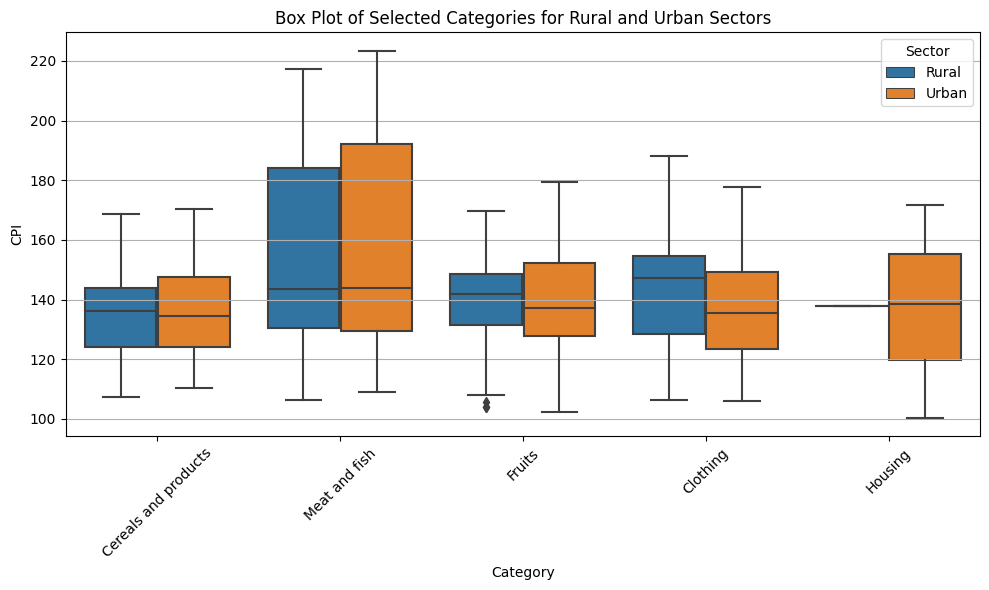

In [ ]:

# Visualization 3: Box plot of selected categories for Rural and Urban sectors
selected_categories = ['Cereals and products', 'Meat and fish', 'Fruits', 'Clothing', 'Housing']
plt.figure(figsize=(10, 6))
df_selected = df[df['Sector'].isin(['Rural', 'Urban'])].copy()
df_selected['Sector'] = df_selected['Sector'].map({'Rural': 'Rural', 'Urban': 'Urban'})
df_selected = df_selected[['Sector'] + selected_categories]
df_selected = df_selected.melt(id_vars='Sector', var_name='Category', value_name='CPI')
plt.xticks(rotation=45)
plt.title('Box Plot of Selected Categories for Rural and Urban Sectors')
plt.grid(axis='y')
sns.boxplot(data=df_selected, x='Category', y='CPI', hue='Sector')
plt.tight_layout()
plt.show()

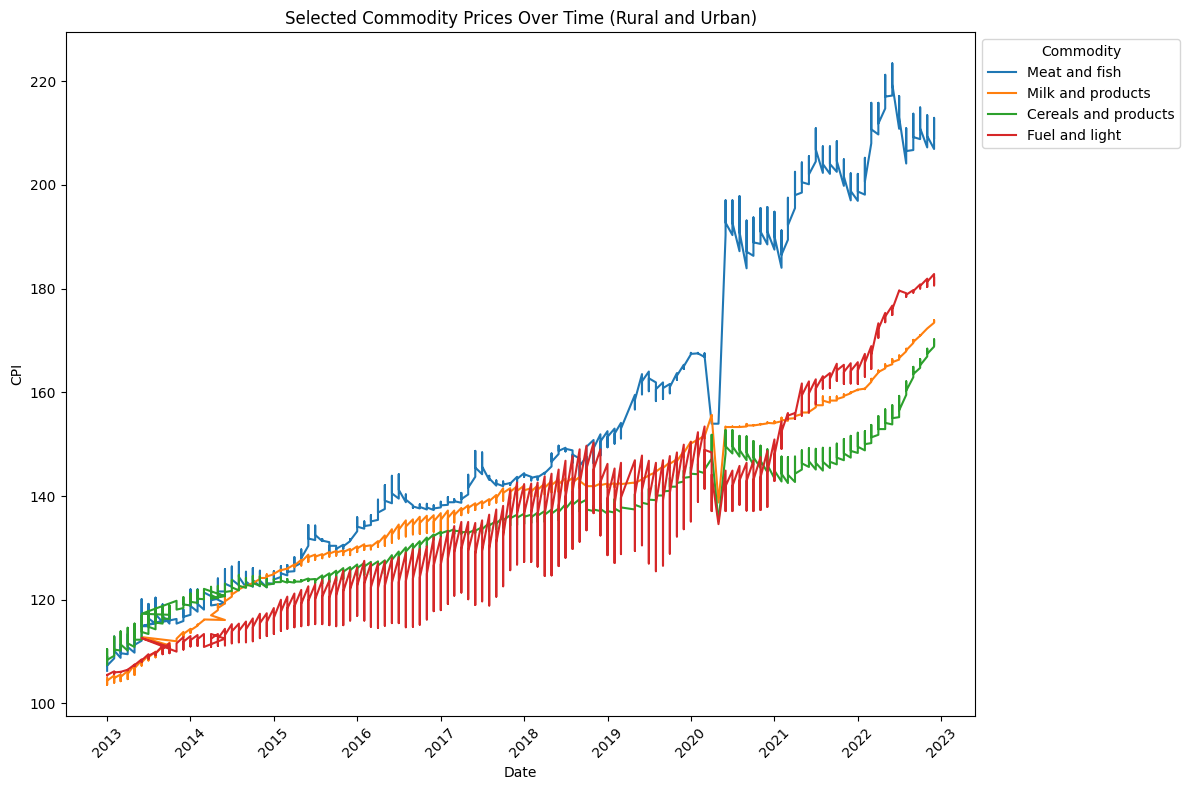

In [ ]:
# Create a line plot for selected commodity categories
selected_commodities = ['Meat and fish', 'Milk and products', 'Cereals and products', 'Fuel and light']

plt.figure(figsize=(12, 8))
for commodity in selected_commodities:
    plt.plot(df['Date'], df[commodity], label=commodity)

plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('Selected Commodity Prices Over Time (Rural and Urban)')
plt.legend(title='Commodity', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


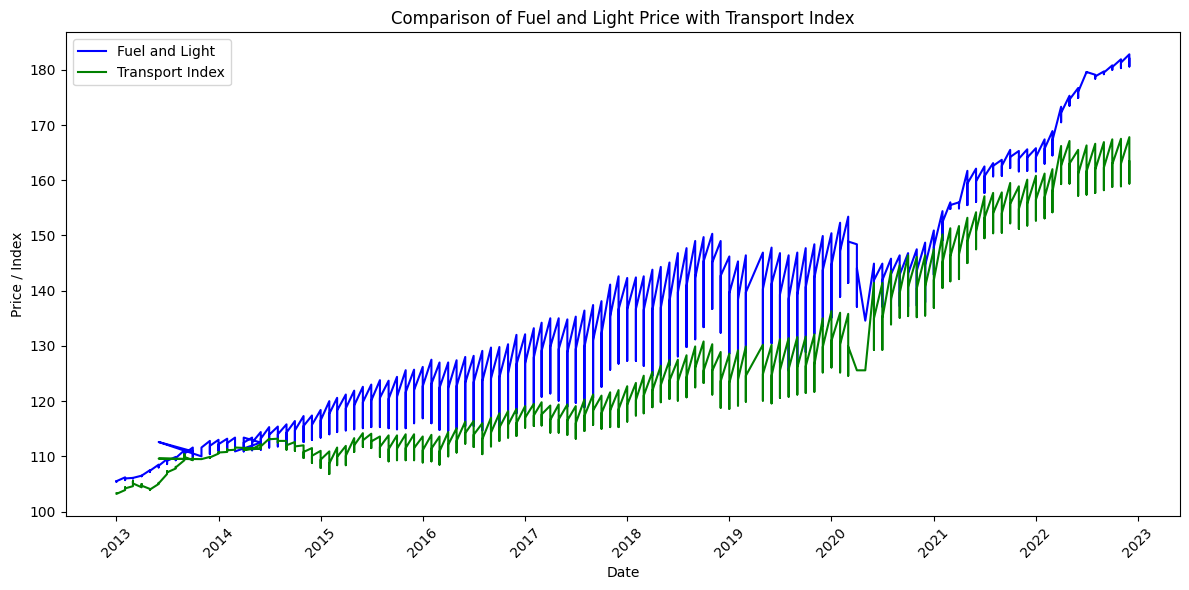

In [ ]:
plt.figure(figsize=(12, 6))

# Line plot for fuel and light
plt.plot(df['Date'], df['Fuel and light'], label='Fuel and Light', color='blue')

# Line plot for transport index
plt.plot(df['Date'], df['Transport and communication'], label='Transport Index', color='green')

plt.xlabel('Date')
plt.ylabel('Price / Index')
plt.title('Comparison of Fuel and Light Price with Transport Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
